![image.png](https://i.imgur.com/1WaY7aA.png)

---



---



# Data Science and AI
## Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [22]:
# insert code here
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score

# import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical

In [3]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [4]:
# insert code here
(X_train, t_train), (X_test, t_test) = cifar10.load_data()
data = cifar10.load_data()


In [5]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

## Check some data

In [6]:
# insert code here
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()


In [7]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

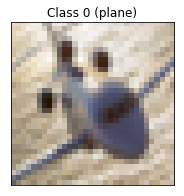

In [8]:
check_one(X_train, t_train.flatten())

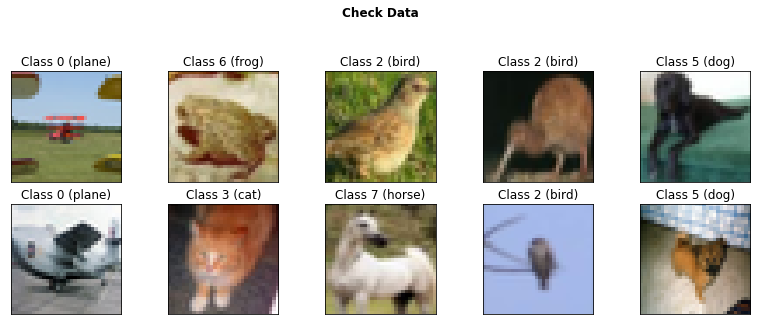

In [9]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [10]:
# insert code here
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likelly to require mo re complex models.

In [11]:
# insert code here
model = Sequential()



In [12]:
# model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.1))
# model.add(Dense(256, activation = 'relu'))
# model.add(Dense(256, activation = 'relu'))
# model.add(Dense(256, activation = 'relu'))
# model.add(Dropout(0.1))
# model.add(Dense(512, activation = 'relu'))
# model.add(Dense(512, activation = 'relu'))
# model.add(Dropout(0.1))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(num_classes, activation = 'softmax'))


In [13]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 96)        83040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 96)          0         
__________

## Compile the model

In [15]:
# insert code here
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Fit the training data

In [16]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [17]:
%%time
# Fit the model on a training set
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 100,
    batch_size = 100,
    callbacks = [tensorboard],
    verbose = 1)
print()

# ..., callbacks = [tensorboard], ...

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 310s 8ms/step - loss: 14.4667 - acc: 0.1019 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 2/100
40000/40000 [==============================] - 299s 7ms/step - loss: 14.5172 - acc: 0.0993 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 3/100
40000/40000 [==============================] - 307s 8ms/step - loss: 14.5309 - acc: 0.0985 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 4/100
40000/40000 [==============================] - 398s 10ms/step - loss: 14.4934 - acc: 0.1008 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 5/100
40000/40000 [==============================] - 417s 10ms/step - loss: 14.5176 - acc: 0.0993 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 6/100
40000/40000 [==============================] - 409s 10ms/step - loss: 14.4861 - acc: 0.1013 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 7/100
40000/40000 [============================

40000/40000 [==============================] - 257s 6ms/step - loss: 14.5115 - acc: 0.0997 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 57/100
40000/40000 [==============================] - 257s 6ms/step - loss: 14.5115 - acc: 0.0997 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 58/100
40000/40000 [==============================] - 257s 6ms/step - loss: 14.5119 - acc: 0.0996 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 59/100
40000/40000 [==============================] - 258s 6ms/step - loss: 14.5119 - acc: 0.0996 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 60/100
40000/40000 [==============================] - 258s 6ms/step - loss: 14.5123 - acc: 0.0996 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 61/100
40000/40000 [==============================] - 260s 6ms/step - loss: 14.5119 - acc: 0.0996 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 62/100
40000/40000 [==============================] - 258s 6ms/step - loss: 14.5119 - acc: 0.0996 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 63/100
40000/

### TensorBoard
- If **TensorBoard** is configured correctly in _all_ steps above then run the command below from a separate **Terminal (maxOS)** or **Command Window (Windows)**.

        tensorboard --logdir=logs

- Point the browser to the following URL

        http://localhost:6006

- Select **SCALARS** and click the Recycle icon

![image.png](attachment:image.png)

## Create predictions

In [24]:

predictions = model.predict_classes(X_test)

## Evaluate the model

In [19]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

10000/10000 [==============================] - 37s 4ms/step

Test loss: 14.506286, Test accuracy: 0.100000


In [20]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))
            
            

In [25]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

    |    0    1    2    3    4    5    6    7    8    9 
--------------------------------------------------------
   0|    0 1000    0    0    0    0    0    0    0    0 
   1|    0 1000    0    0    0    0    0    0    0    0 
   2|    0 1000    0    0    0    0    0    0    0    0 
   3|    0 1000    0    0    0    0    0    0    0    0 
   4|    0 1000    0    0    0    0    0    0    0    0 
   5|    0 1000    0    0    0    0    0    0    0    0 
   6|    0 1000    0    0    0    0    0    0    0    0 
   7|    0 1000    0    0    0    0    0    0    0    0 
   8|    0 1000    0    0    0    0    0    0    0    0 
   9|    0 1000    0    0    0    0    0    0    0    0 


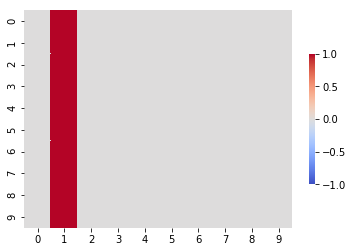

In [26]:
import seaborn as sns

heatmap = sns.heatmap(cm, cmap = 'coolwarm', cbar_kws = {'shrink': .6, 'ticks' : [-1, -.5, 0, 0.5, 1]}, 
                          vmin = -1, vmax = 1)


## Visualisation of cost

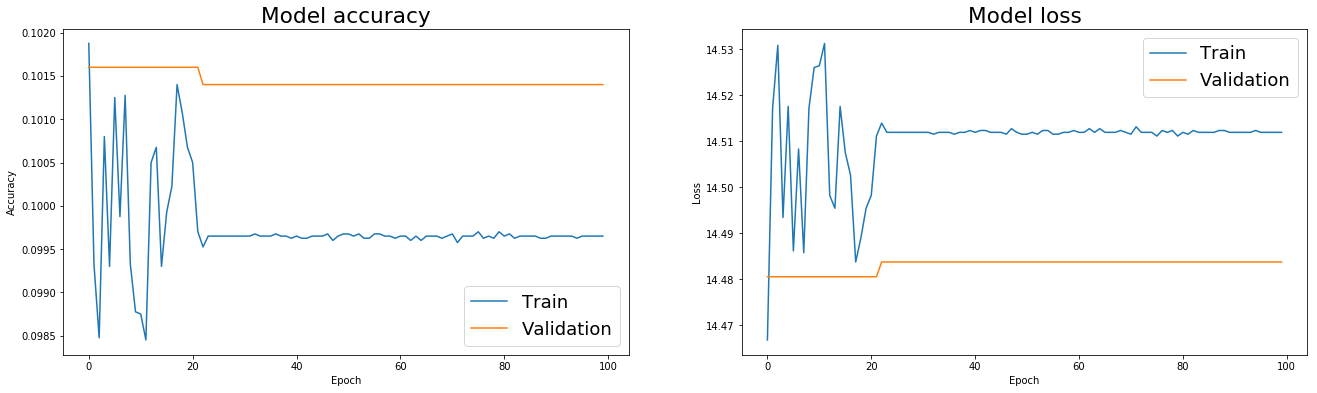

In [27]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history['acc'])
ax[0].plot(model.history.history['val_acc'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'])
ax[1].plot(model.history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

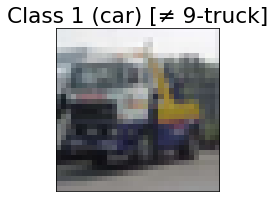

In [28]:
# insert code here
check_one(X_test, predictions, actual = y_test, compare = True)


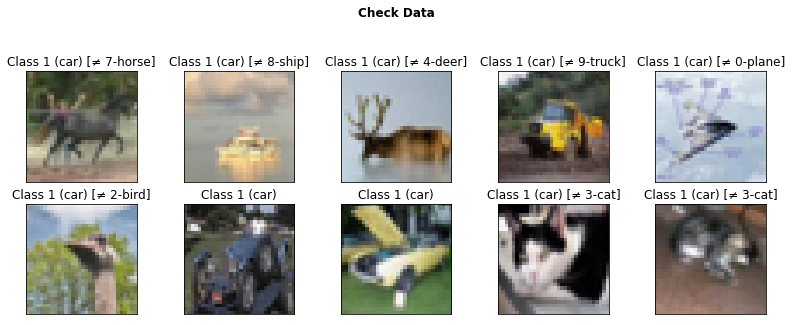

In [29]:
check_ten(X_test, predictions, actual = y_test, compare = True)


>

>

>



---



---



> > > > > > > > > © 2019 Data Science Institute of Australia


---



---



